## Pair Beautiful Soup

Enunciado: Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:

1. Realizará una solicitud HTTP GET a la siguiente url.

In [3]:
url_coches="https://www.ocasionplus.com/coches-segunda-mano?v2&orderBy=morePopular"

2. Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.

In [4]:
!pip install beautifulsoup4


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\InvitadoLaptop\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [6]:
scrape_coches_ocasion=requests.get(url_coches)
scrape_coches_ocasion.status_code

200

3. Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

b'<!DOCTYPE html><html lang="es"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1"/><link rel="preload" as="image" href="https://images.grupoocasionplus.com/1JKwtZDyKnBSZaxoNSIYqwZlroCaquRQ8-vkSpnSH9s/mobilex2a/aHR0cHM6Ly9mb3Rvcy5lc3RhdGljb3NtZi5jb20vZm90b3NfYW51bmNpb3MvMDAvMDMvOTcvMjkvNjQvOS94MDEuanBnPzE0Nzc3NjczOTIyPSZtZDU9NjdkYzZhMWU5NDU3M2RhOGVjZDY2NWYwNzU4NjRkZWY" fetchPriority="high"/><link rel="stylesheet" href="/hera/_next/static/css/947b97ffbe7f670e.css" data-precedence="next"/><link rel="stylesheet" href="/hera/_next/static/css/4621d5856ff84749.css" data-precedence="next"/><link rel="stylesheet" href="/hera/_next/static/css/8517fc2698044916.css" data-precedence="next"/><link rel="stylesheet" href="/hera/_next/static/css/1e0ae1308e6b8f46.css" data-precedence="next"/><link rel="stylesheet" href="/hera/_next/static/css/d1a51260c3e4ab42.css" data-precedence="next"/><link rel="stylesheet" href="/hera/_next/static/css/ec946dd507681432.
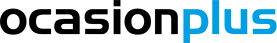

In [7]:
scrape_coches_ocasion.content

<!DOCTYPE html>
<html lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="image" fetchpriority="high" href="https://images.grupoocasionplus.com/1JKwtZDyKnBSZaxoNSIYqwZlroCaquRQ8-vkSpnSH9s/mobilex2a/aHR0cHM6Ly9mb3Rvcy5lc3RhdGljb3NtZi5jb20vZm90b3NfYW51bmNpb3MvMDAvMDMvOTcvMjkvNjQvOS94MDEuanBnPzE0Nzc3NjczOTIyPSZtZDU9NjdkYzZhMWU5NDU3M2RhOGVjZDY2NWYwNzU4NjRkZWY" rel="preload"/>
  <link data-precedence="next" href="/hera/_next/static/css/947b97ffbe7f670e.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/4621d5856ff84749.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/8517fc2698044916.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/1e0ae1308e6b8f46.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/d1a51260c3e4ab42.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/
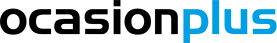

In [8]:
sopa_coches=BeautifulSoup(scrape_coches_ocasion.content, "html.parser")

print(sopa_coches.prettify())

In [27]:
lista_nombres_coches=sopa_coches.find_all("span", {"data-test":"span-brand-model"})

lista_nombres_coches

[<span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Suzuki Swift</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Nissan X-TRAIL</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Citroën Berlingo</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Renault Trafic</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Renault Kangoo Furgón</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Mitsubishi ASX</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Jaguar F-Pace</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Toyota Aygo</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Mini MINI</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Audi Q3 Sportback</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Volkswagen T-Roc</spa

In [30]:
lista_nombres_coches[1].text

'Nissan X-TRAIL'

In [11]:
nombre_coches = []

for nombre in lista_nombres_coches:
    nombre_coches.append(nombre.text)

nombre_coches

['Suzuki Swift',
 'Nissan X-TRAIL',
 '19.800€',
 'Citroën Berlingo',
 '18.200€',
 'Renault Trafic',
 '21.900€',
 'Renault Kangoo Furgón',
 '9.900€',
 'Mitsubishi ASX',
 '17.400€',
 'Jaguar F-Pace',
 '30.990€',
 'Toyota Aygo',
 'Mini MINI',
 '10.990€',
 'Audi Q3 Sportback',
 '39.900€',
 'Volkswagen T-Roc',
 '29.900€',
 'Volkswagen Taigo',
 '19.550€',
 'Volkswagen T-Cross',
 '19.790€',
 'Volkswagen T-Cross',
 '19.900€',
 'Seat León',
 '14.950€',
 'Seat León',
 '16.900€',
 'Ford Fiesta',
 '18.900€',
 'Ford Fiesta',
 '18.200€',
 'Ford Kuga',
 '28.900€',
 'Ford Kuga',
 '29.350€']

In [12]:
lista_precio_rebaja = sopa_coches.find_all("span", {"data-test":"span-finance"})
lista_precio_rebaja

[<span class="cardVehicle_finance__SG6JV" data-test="span-finance">4.900€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">16.819€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">16.546€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">19.910€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">8.728€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">15.364€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">24.764€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">12.900€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">9.800€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">34.082€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">25.905€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">16.691€</span>,
 <span 

In [13]:
lista_precio_rebaja [0].text

'4.900€'

In [14]:
precio_rebaja = []

for precio in lista_precio_rebaja:
    precio_rebaja.append(precio.text)

precio_rebaja

['4.900€',
 '16.819€',
 '16.546€',
 '19.910€',
 '8.728€',
 '15.364€',
 '24.764€',
 '12.900€',
 '9.800€',
 '34.082€',
 '25.905€',
 '16.691€',
 '17.237€',
 '17.182€',
 '12.364€',
 '13.137€',
 '14.410€',
 '14.991€',
 '22.487€',
 '23.364€']

In [15]:
lista_km = sopa_coches.find_all("span", {"data-test":"span-km"})
lista_km

[<span class="characteristics_elements__Mb1S_" data-test="span-km">100.910 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">127.683 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">100.366 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">65.942 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">128.343 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">21.610 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">139.456 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">30.479 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">135.506 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">46.374 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">39.247 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="s

In [16]:
lista_km [0].text

'100.910 Km'

In [17]:
coche_km = []

for km in lista_km:
    coche_km.append(km.text)

coche_km

['100.910 Km',
 '127.683 Km',
 '100.366 Km',
 '65.942 Km',
 '128.343 Km',
 '21.610 Km',
 '139.456 Km',
 '30.479 Km',
 '135.506 Km',
 '46.374 Km',
 '39.247 Km',
 '33.305 Km',
 '38.071 Km',
 '30.920 Km',
 '99.794 Km',
 '86.051 Km',
 '37.084 Km',
 '29.003 Km',
 '52.196 Km',
 '34.078 Km']

4. Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:

* "coche": Nombres de los coches.

* "precio_rebajado": Precios rebajados.

* "precio_original": Precios originales.

* "km": Kilómetros recorridos.

In [ ]:
def sacar_coches(url):

    scrape_coches_ocasion=requests.get(url_coches)

    print(f"La respuesta a tu peticion ha sido de {scrape_coches_ocasion.status_code}")

    sopa_coches=BeautifulSoup(scrape_coches_ocasion.content, "html.parser")

    lista_nombres_coches =sopa_coches.find_all("span", {"class":"cardVehicle_spot__e6YZx"})
    lista_precio_rebaja = sopa_coches.find_all("span", {"data-test":"span-finance"})
    lista_km = sopa_coches.find_all("span", {"data-test":"span-km"})

    nombre_coches = []

    for nombre in lista_nombres_coches:
        nombre_coches.append(nombre.text)

    precio_rebaja = []
    
    for precio in lista_precio_rebaja:
       precio_rebaja.append(precio.text)

    coche_km = []

    for km in lista_km:
       coche_km.append(km.text)
   
    lista_elementos = [nombre_coches, precio_rebaja, coche_km]
    claves = ["coche", "precio_original", "precio_rebajado", "km"]
    diccionario = {}

    for lista, clave in zip(lista_elementos, claves):
        diccionario[clave]=lista

    return diccionario



In [24]:
diccionario=sacar_coches("https://www.ocasionplus.com/coches-segunda-mano?v2&orderBy=morePopular")

La respuesta a tu peticion ha sido de 200


In [25]:
df_diccionario=pd.DataFrame(diccionario)

df_diccionario

ValueError: All arrays must be of the same length